In [8]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import adfuller
from scipy.stats import pearsonr, spearmanr
import datetime 

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

In [9]:
def plot_trend(var):
    fig = make_subplots(rows=3, cols=1, subplot_titles=['Trend', 'Seasonality', 'Residual'], shared_xaxes=True)
    fig.add_trace(go.Scatter(x=var.trend.index, y=var.trend, mode='lines+markers'), row=1, col=1)
    fig.add_trace(go.Scatter(x=var.seasonal.index, y=var.seasonal, mode='lines+markers'), row=2, col=1)
    fig.add_trace(go.Scatter(x=var.resid.index, y=var.resid, mode='lines+markers'), row=3, col=1)
    fig.show()

def plot_regions(var):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=var.index, y=var.loc[:, "Piemonte"], line={'color': 'red'}, name="Piemonte"))
    fig.add_trace(go.Scatter(x=var.index, y=var.loc[:, "Emilia-Romagna"], line={'color': 'blue'}, name="Emilia-Romagna"))
    fig.add_trace(go.Scatter(x=var.index, y=var.loc[:, "Umbria"], line={'color': 'green'}, name="Umbria"))
    fig.add_trace(go.Scatter(x=var.index, y=var.loc[:, "Puglia"], line={'color': 'orange'}, name="Puglia"))
    fig.add_trace(go.Scatter(x=var.index, y=var.loc[:, "Sicilia"], line={'color': 'cyan'}, name="Sicilia"))
    fig.add_trace(go.Scatter(x=var.index, y=var.loc[:, "Sardegna"], line={'color': 'black'}, name="Sardegna"))
    fig.update_layout(title_text="Evapotranspiration")
    fig.update_xaxes(title_text="Date")
    fig.update_yaxes(title_text="mm/mese")
    fig.show()

def correll(df, reg1, reg2, lag):
    print("Correlation between " + reg1 + " and " + reg2 + " :\nCorrelation matrix: \n" + str(np.cov(df[reg1],df[reg2])))
    print("Pearsons correlation: " + str(pearsonr(df[reg1],df[reg2])[0]))
    print("Spearmans correlation: " + str(spearmanr(df[reg1],df[reg2])[0]))
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df[reg1], y=df[reg2], mode='markers', line={'color': 'red'}, name='Synchronous'))
    fig.add_trace(go.Scatter(x=df[reg1].diff(lag), y=df[reg2].diff(lag), mode='markers', line={'color': 'orange'}, name='Difference synchronous', visible="legendonly"))
    fig.update_layout(title_text = "Correlation between regions")
    fig.update_xaxes(title_text = reg1)
    fig.update_yaxes(title_text = reg2)
    fig.show()


def tp_ae_correll(tp, ae, reg, lag):
    print("Correlation between Precipitation and Evapotranspiration in " + reg + " :\nCorrelation matrix: \n" + str(np.cov(tp[reg],ae[reg])))
    print("Pearsons correlation: " + str(pearsonr(tp[reg],ae[reg])[0]))
    print("Spearmans correlation: " + str(spearmanr(tp[reg],ae[reg])[0]))
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=tp.loc[:, reg], y=ae.loc[:, reg], mode='markers', line={'color': 'red'}, name='Synchronous'))
    fig.add_trace(go.Scatter(x=tp.loc[:, reg].diff(lag), y=ae.loc[:, reg].diff(lag), mode='markers', line={'color': 'orange'}, name='Difference synchronous', visible="legendonly"))
    fig.update_layout(title_text = "Scatter plot")
    fig.update_xaxes(title_text = "Precipitation")
    fig.update_yaxes(title_text = "Evapotranspiration")
    fig.show()

def tp_ae_ratio(tp, ae, reg):
    perc = ae.loc[:, reg]/tp.loc[:, reg]
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=ae.loc[:, reg].index, y=ae.loc[:, reg], name="Evapotranspiration"))
    fig.add_trace(go.Scatter(x=tp.loc[:, reg].index, y=tp.loc[:, reg], name="Precipitation"))
    fig.update_layout(title_text = "Scatter plot")
    fig.update_xaxes(title_text = "Time")
    fig.update_yaxes(title_text = "Evapotranspiration/Precipitation")
    fig.show()
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=ae.loc[:, reg].index, y=perc, line={'color': 'red'}))
    fig.update_layout(title_text = "Scatter plot")
    fig.update_xaxes(title_text = "Time")
    fig.update_yaxes(title_text = "Evapotranspiration/Precipitation")
    fig.show()

def is_series_stationary(series):
  result = adfuller(series)
  return result, result[0] < result[4]['1%']

In [3]:
file_ae = "output/ae.csv"
file_tp = "output/tp.csv"
ae_all = pd.read_csv(file_ae, parse_dates=["month"], index_col="month")
tp_all = pd.read_csv(file_tp, parse_dates=["month"], index_col="month")
regions = ["Piemonte", "Emilia-Romagna", "Umbria", "Puglia", "Sicilia", "Sardegna"]
comb = [(regions[i],regions[j]) for i in range(len(regions)) for j in range(i+1, len(regions))]
 
ae = ae_all.filter(regions, axis=1)
tp = tp_all.filter(regions, axis=1)
ae.index.freq = ae.index.inferred_freq
tp.index.freq = tp.index.inferred_freq
plot_regions(ae)
plot_regions(tp)

In [15]:
tp["Piemonte"].tail(12).sum()

1257.9371543631428

## Correlation between regions

#### Evapotraspiration correlation

In [4]:
for couple in comb:
    correll(ae, couple[0], couple[1], 12)

Correlation between Piemonte and Emilia-Romagna :
Correlation matrix: 
[[1068.97677802  975.89313193]
 [ 975.89313193 1011.68386473]]
Pearsons correlation: 0.9384166708551571
Spearmans correlation: 0.953126976856067


Correlation between Piemonte and Umbria :
Correlation matrix: 
[[1068.97677802  931.2574872 ]
 [ 931.2574872   961.3840854 ]]
Pearsons correlation: 0.9186227098828419
Spearmans correlation: 0.9362330509480484


Correlation between Piemonte and Puglia :
Correlation matrix: 
[[1068.97677802  448.66246289]
 [ 448.66246289  495.96339619]]
Pearsons correlation: 0.6161845261730399
Spearmans correlation: 0.6491297885538103


Correlation between Piemonte and Sicilia :
Correlation matrix: 
[[1068.97677802  222.8090065 ]
 [ 222.8090065   387.98189774]]
Pearsons correlation: 0.3459735319645973
Spearmans correlation: 0.35096565544437613


Correlation between Piemonte and Sardegna :
Correlation matrix: 
[[1068.97677802  313.6031915 ]
 [ 313.6031915   463.81721436]]
Pearsons correlation: 0.445371996659109
Spearmans correlation: 0.4239723445360488


Correlation between Emilia-Romagna and Umbria :
Correlation matrix: 
[[1011.68386473  941.17550997]
 [ 941.17550997  961.3840854 ]]
Pearsons correlation: 0.9543325612617589
Spearmans correlation: 0.9646948105755839


Correlation between Emilia-Romagna and Puglia :
Correlation matrix: 
[[1011.68386473  523.34133743]
 [ 523.34133743  495.96339619]]
Pearsons correlation: 0.7388185917363488
Spearmans correlation: 0.7610962737796395


Correlation between Emilia-Romagna and Sicilia :
Correlation matrix: 
[[1011.68386473  296.10736128]
 [ 296.10736128  387.98189774]]
Pearsons correlation: 0.47262975630093246
Spearmans correlation: 0.4715967011425608


Correlation between Emilia-Romagna and Sardegna :
Correlation matrix: 
[[1011.68386473  396.94123709]
 [ 396.94123709  463.81721436]]
Pearsons correlation: 0.5794692243302456
Spearmans correlation: 0.5490132834580838


Correlation between Umbria and Puglia :
Correlation matrix: 
[[961.3840854  511.92992562]
 [511.92992562 495.96339619]]
Pearsons correlation: 0.7413738112743841
Spearmans correlation: 0.771096331489964


Correlation between Umbria and Sicilia :
Correlation matrix: 
[[961.3840854  298.4885469 ]
 [298.4885469  387.98189774]]
Pearsons correlation: 0.4887350388368423
Spearmans correlation: 0.4928528722629319


Correlation between Umbria and Sardegna :
Correlation matrix: 
[[961.3840854  395.91507069]
 [395.91507069 463.81721436]]
Pearsons correlation: 0.5928982080689255
Spearmans correlation: 0.5670129856897208


Correlation between Puglia and Sicilia :
Correlation matrix: 
[[495.96339619 341.15241076]
 [341.15241076 387.98189774]]
Pearsons correlation: 0.7777103889570518
Spearmans correlation: 0.7735963089237474


Correlation between Puglia and Sardegna :
Correlation matrix: 
[[495.96339619 367.35100028]
 [367.35100028 463.81721436]]
Pearsons correlation: 0.765919245832329
Spearmans correlation: 0.7598539797726792


Correlation between Sicilia and Sardegna :
Correlation matrix: 
[[387.98189774 355.21032701]
 [355.21032701 463.81721436]]
Pearsons correlation: 0.8373488349560428
Spearmans correlation: 0.8547362429948808


#### Precipitation correlation

In [5]:
for couple in comb:
    correll(tp, couple[0], couple[1], 12)

Correlation between Piemonte and Emilia-Romagna :
Correlation matrix: 
[[4330.68593508 1664.74492436]
 [1664.74492436 1943.26174327]]
Pearsons correlation: 0.5738570273181304
Spearmans correlation: 0.6057973043866801


Correlation between Piemonte and Umbria :
Correlation matrix: 
[[4330.68593508 1344.93115927]
 [1344.93115927 2392.70176774]]
Pearsons correlation: 0.4178086484569886
Spearmans correlation: 0.42881504405422255


Correlation between Piemonte and Puglia :
Correlation matrix: 
[[4330.68593508  271.34808515]
 [ 271.34808515 1361.40917575]]
Pearsons correlation: 0.11175168489403914
Spearmans correlation: 0.10492123840775565


Correlation between Piemonte and Sicilia :
Correlation matrix: 
[[4330.68593508  215.48274181]
 [ 215.48274181 2241.32112112]]
Pearsons correlation: 0.06916431917464051
Spearmans correlation: -0.01873562513504057


Correlation between Piemonte and Sardegna :
Correlation matrix: 
[[4330.68593508  943.45865452]
 [ 943.45865452 2432.90725873]]
Pearsons correlation: 0.2906576452969049
Spearmans correlation: 0.22510761865702492


Correlation between Emilia-Romagna and Umbria :
Correlation matrix: 
[[1943.26174327 1654.78413408]
 [1654.78413408 2392.70176774]]
Pearsons correlation: 0.7674169947900905
Spearmans correlation: 0.8022101659083043


Correlation between Emilia-Romagna and Puglia :
Correlation matrix: 
[[1943.26174327  688.63834152]
 [ 688.63834152 1361.40917575]]
Pearsons correlation: 0.4233808517300946
Spearmans correlation: 0.4702189464179085


Correlation between Emilia-Romagna and Sicilia :
Correlation matrix: 
[[1943.26174327  645.32738735]
 [ 645.32738735 2241.32112112]]
Pearsons correlation: 0.3092163179596676
Spearmans correlation: 0.3150985830804701


Correlation between Emilia-Romagna and Sardegna :
Correlation matrix: 
[[1943.26174327 1129.67694378]
 [1129.67694378 2432.90725873]]
Pearsons correlation: 0.5195481916912825
Spearmans correlation: 0.5386839386691876


Correlation between Umbria and Puglia :
Correlation matrix: 
[[2392.70176774  805.54812205]
 [ 805.54812205 1361.40917575]]
Pearsons correlation: 0.4463266997797277
Spearmans correlation: 0.5224665553343608


Correlation between Umbria and Sicilia :
Correlation matrix: 
[[2392.70176774  681.10707934]
 [ 681.10707934 2241.32112112]]
Pearsons correlation: 0.2941162819425737
Spearmans correlation: 0.36343087413997605


Correlation between Umbria and Sardegna :
Correlation matrix: 
[[2392.70176774 1345.34753686]
 [1345.34753686 2432.90725873]]
Pearsons correlation: 0.5576059838162495
Spearmans correlation: 0.6053349876114112


Correlation between Puglia and Sicilia :
Correlation matrix: 
[[1361.40917575 1205.41626255]
 [1205.41626255 2241.32112112]]
Pearsons correlation: 0.690066060102776
Spearmans correlation: 0.7107862097353427


Correlation between Puglia and Sardegna :
Correlation matrix: 
[[1361.40917575 1066.68470496]
 [1066.68470496 2432.90725873]]
Pearsons correlation: 0.586109760942607
Spearmans correlation: 0.624730962605887


Correlation between Sicilia and Sardegna :
Correlation matrix: 
[[2241.32112112 1749.99421709]
 [1749.99421709 2432.90725873]]
Pearsons correlation: 0.7494139872469674
Spearmans correlation: 0.7794055189715082


## Correlazion Evaporation-Precipitation

In [6]:
for region in regions:
    tp_ae_correll(tp, ae, region, 12)
    tp_ae_ratio(tp, ae, region)

Correlation between Precipitation and Evapotranspiration in Piemonte :
Correlation matrix: 
[[4330.68593508  421.49081086]
 [ 421.49081086 1068.97677802]]
Pearsons correlation: 0.19589602813637935
Spearmans correlation: 0.3214398062184544


Correlation between Precipitation and Evapotranspiration in Emilia-Romagna :
Correlation matrix: 
[[1943.26174327   31.40727053]
 [  31.40727053 1011.68386473]]
Pearsons correlation: 0.022399696460289165
Spearmans correlation: 0.05375968283589465


Correlation between Precipitation and Evapotranspiration in Umbria :
Correlation matrix: 
[[2392.70176774 -136.69828681]
 [-136.69828681  961.3840854 ]]
Pearsons correlation: -0.09013019739218016
Spearmans correlation: -0.06895798216970822


Correlation between Precipitation and Evapotranspiration in Puglia :
Correlation matrix: 
[[1361.40917575   14.84413286]
 [  14.84413286  495.96339619]]
Pearsons correlation: 0.018064905064340546
Spearmans correlation: 0.06313809676888348


Correlation between Precipitation and Evapotranspiration in Sicilia :
Correlation matrix: 
[[2241.32112112   22.10210845]
 [  22.10210845  387.98189774]]
Pearsons correlation: 0.023701505462826046
Spearmans correlation: 0.08747633744575413


Correlation between Precipitation and Evapotranspiration in Sardegna :
Correlation matrix: 
[[2432.90725873   47.00125752]
 [  47.00125752  463.81721436]]
Pearsons correlation: 0.0442459239912175
Spearmans correlation: 0.1509483930813819


## Auto correlation

Correlation in Piemonte
Evapotranspiration


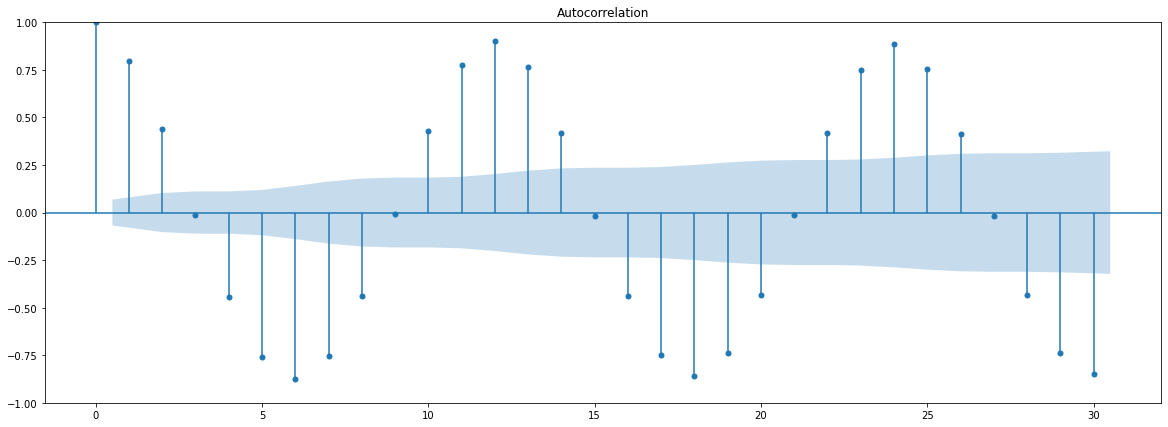

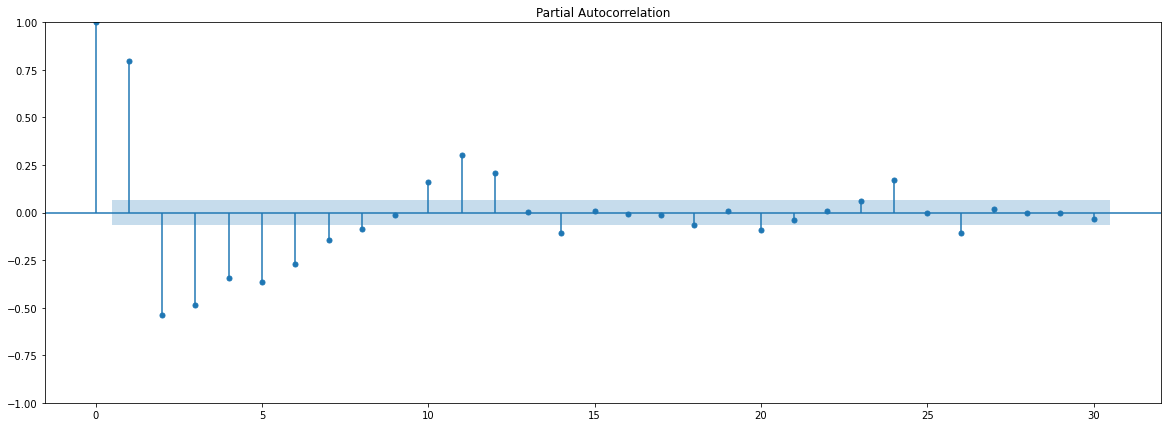

Precipitation


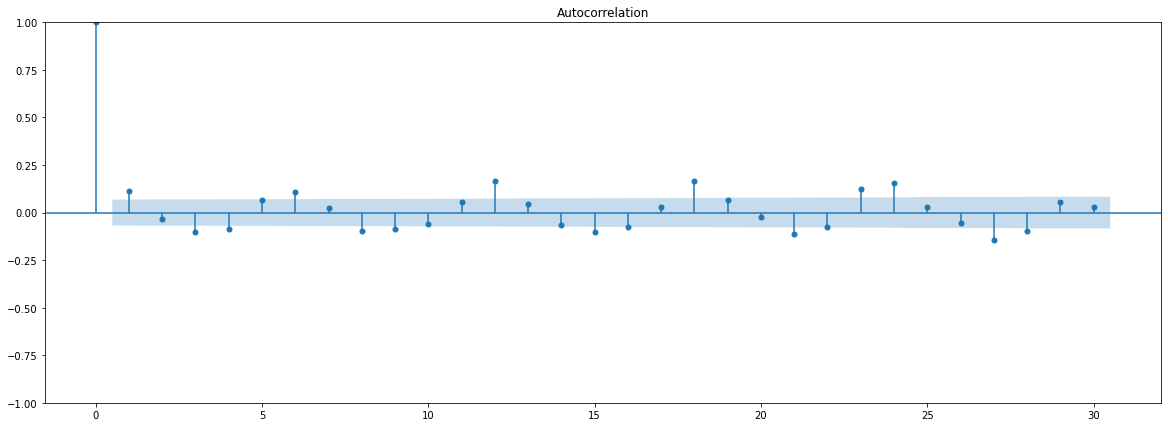

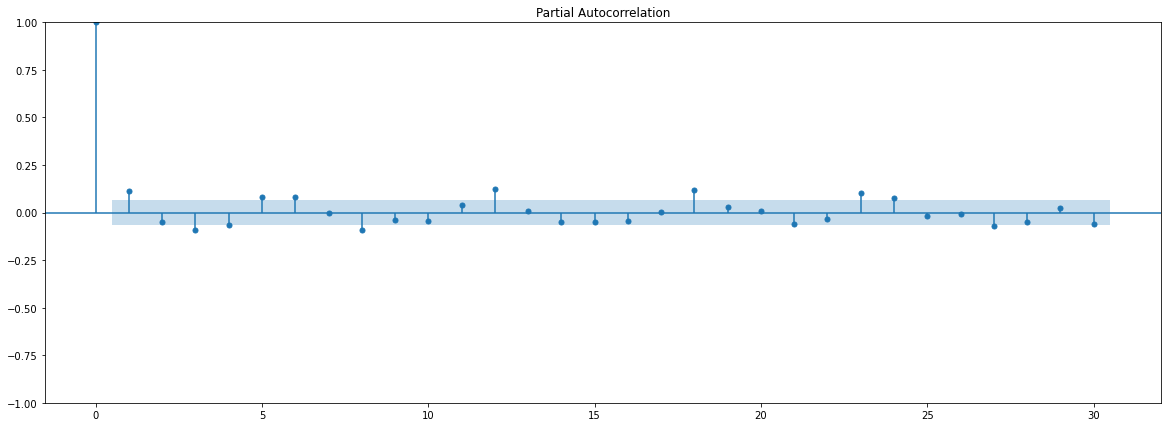

Stationarity
Evapotranspiration
((-7.0284161643100465, 6.276455675329113e-10, 19, 808, {'1%': -3.4384690549764856, '5%': -2.8651236651346306, '10%': -2.568678262976669}, 6103.161389981527), True)
Precipitation
((-6.202742908973902, 5.754378906345045e-08, 17, 810, {'1%': -3.438448943858302, '5%': -2.8651148002318227, '10%': -2.568673540618808}, 8986.790063016237), True)
Correlation in Emilia-Romagna
Evapotranspiration


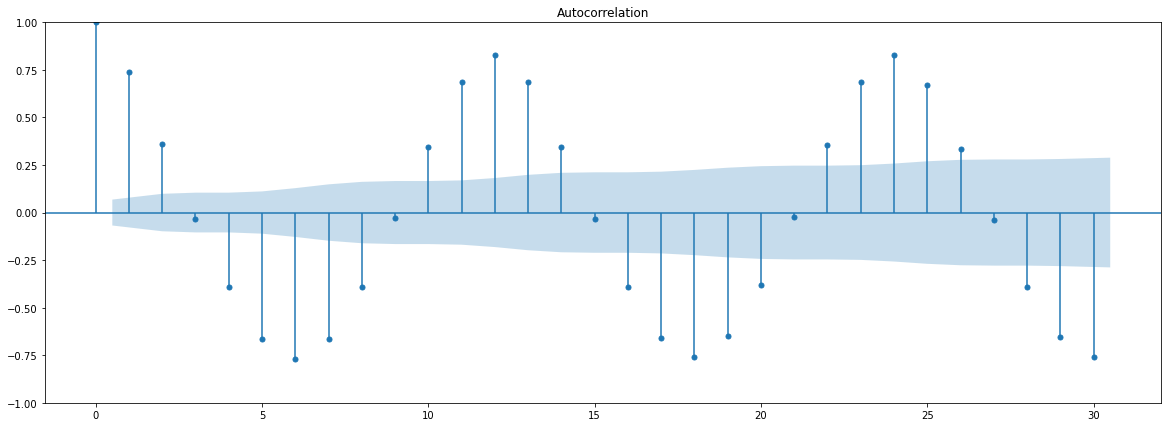

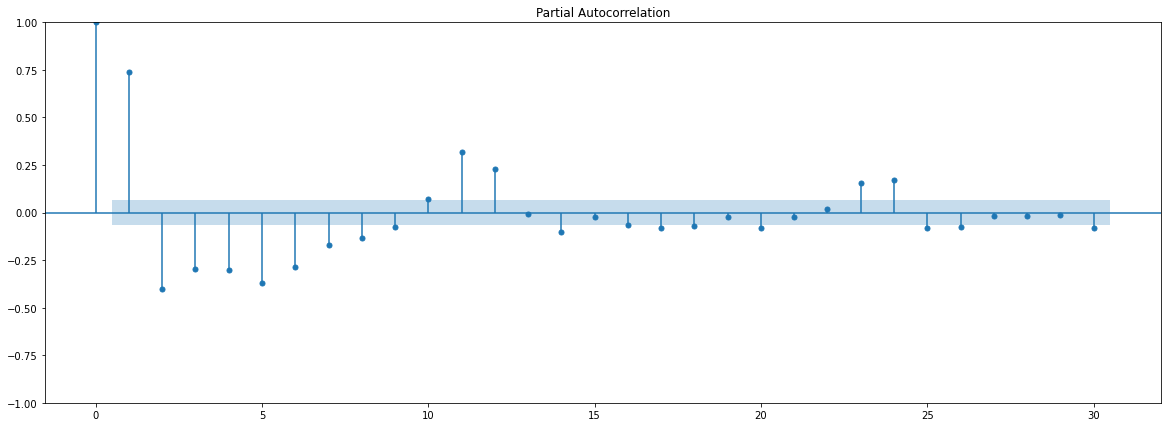

Precipitation


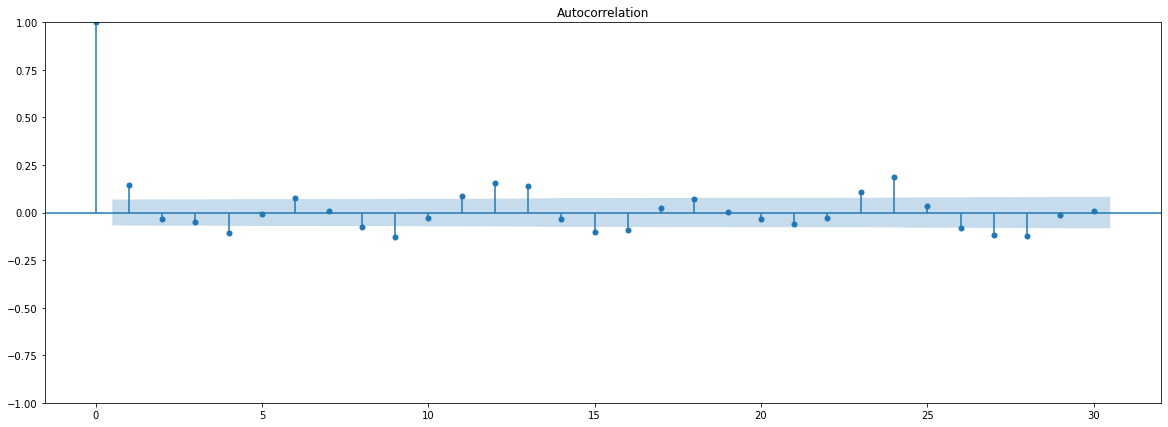

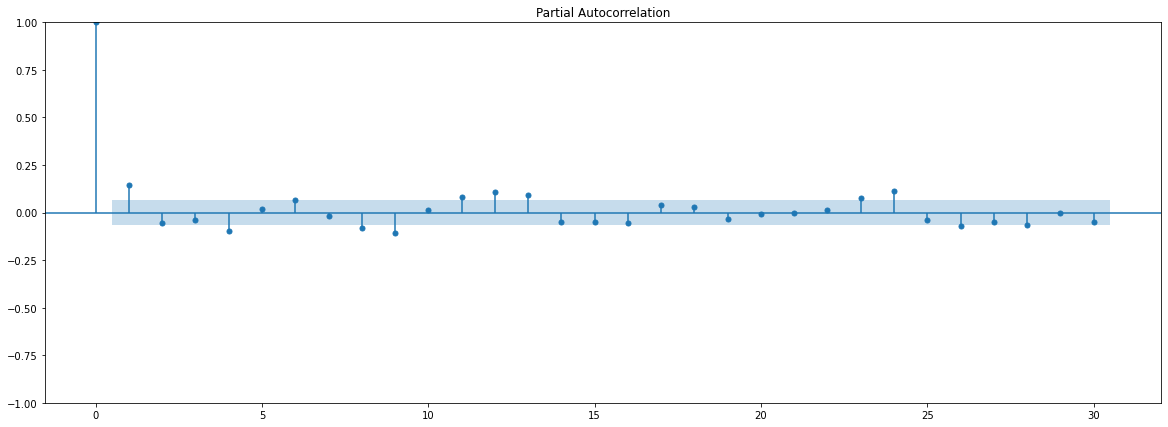

Stationarity
Evapotranspiration
((-8.310336546737663, 3.804090456875345e-13, 19, 808, {'1%': -3.4384690549764856, '5%': -2.8651236651346306, '10%': -2.568678262976669}, 6534.219562249029), True)
Precipitation
((-7.185511317054725, 2.5831157137579355e-10, 15, 812, {'1%': -3.4384289321263126, '5%': -2.865105979079729, '10%': -2.568668841575869}, 8344.629163864294), True)
Correlation in Umbria
Evapotranspiration


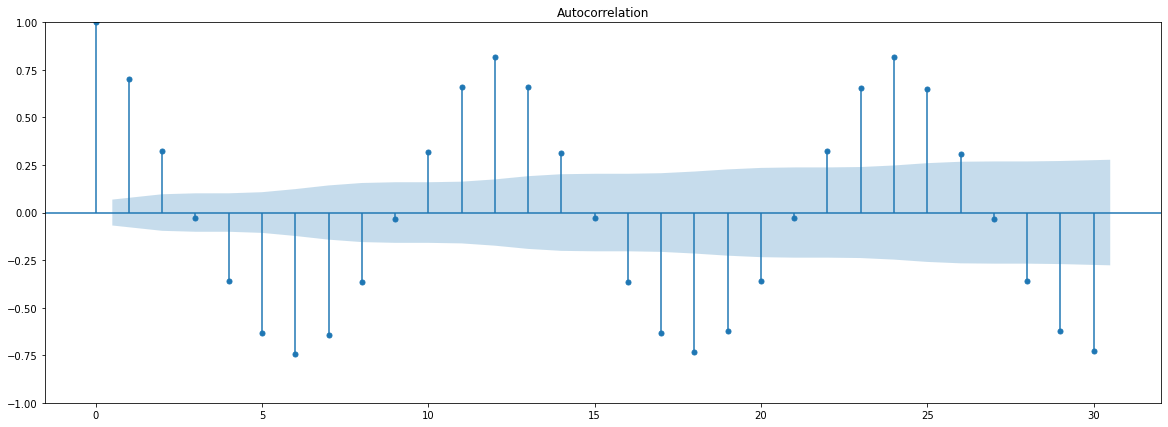

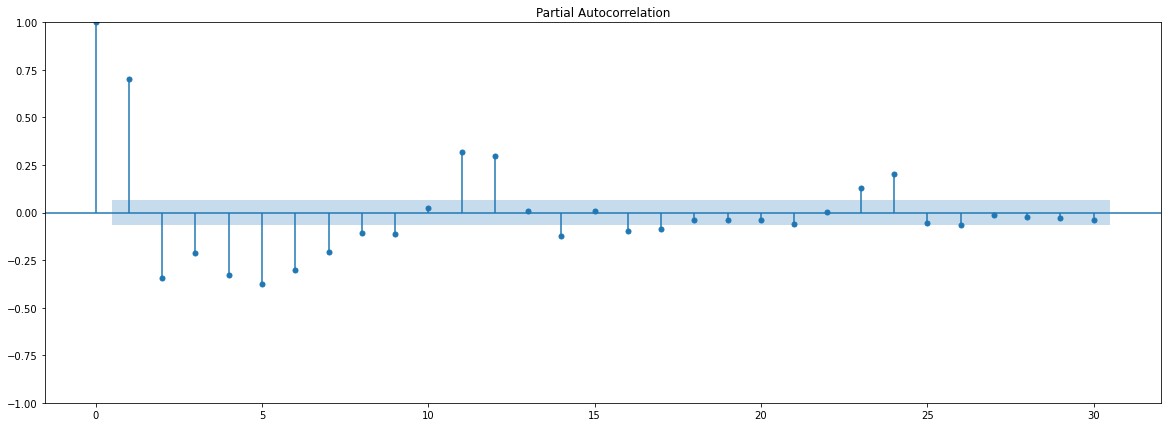

Precipitation


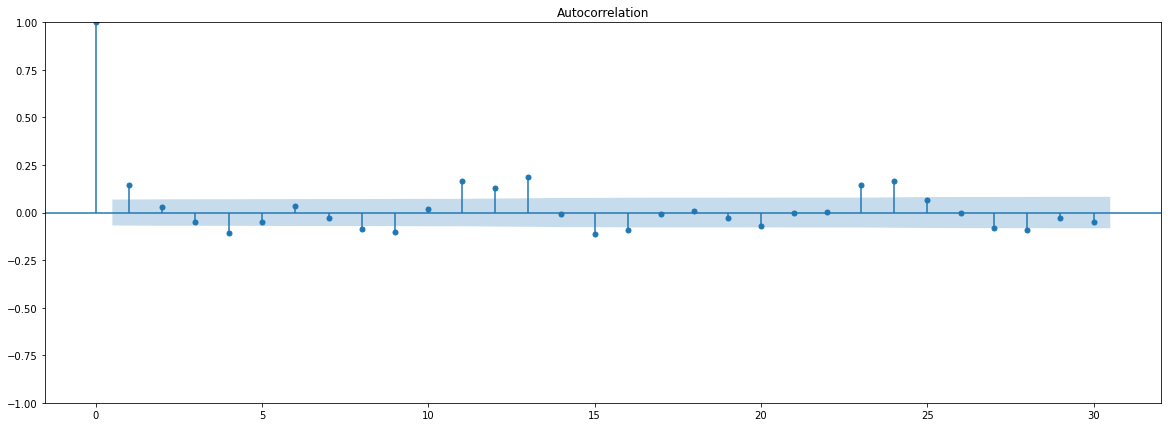

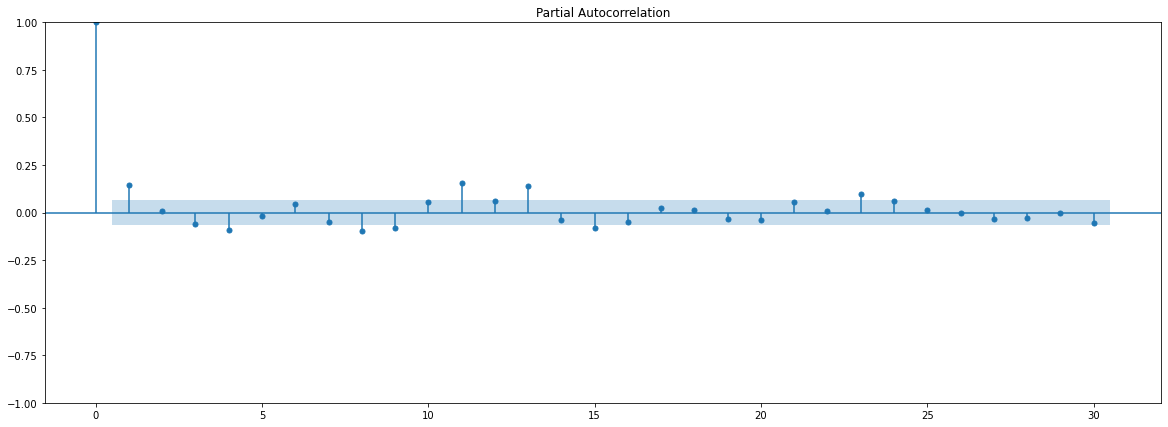

Stationarity
Evapotranspiration
((-8.136052491820852, 1.0585213077743517e-12, 20, 807, {'1%': -3.4384791480370605, '5%': -2.865128114094396, '10%': -2.5686806329529874}, 6594.657610092848), True)
Precipitation
((-6.796840611215074, 2.2894908645888136e-09, 15, 812, {'1%': -3.4384289321263126, '5%': -2.865105979079729, '10%': -2.568668841575869}, 8494.009635853805), True)
Correlation in Puglia
Evapotranspiration


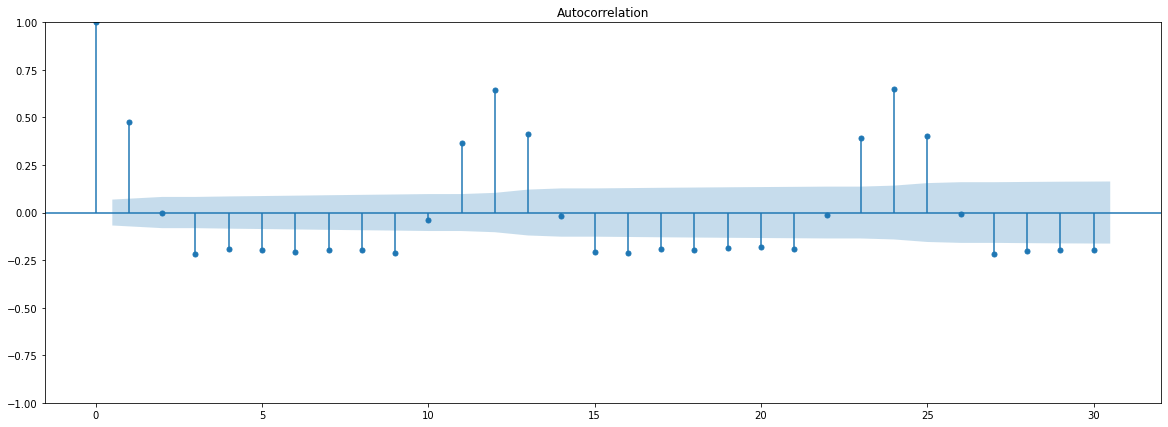

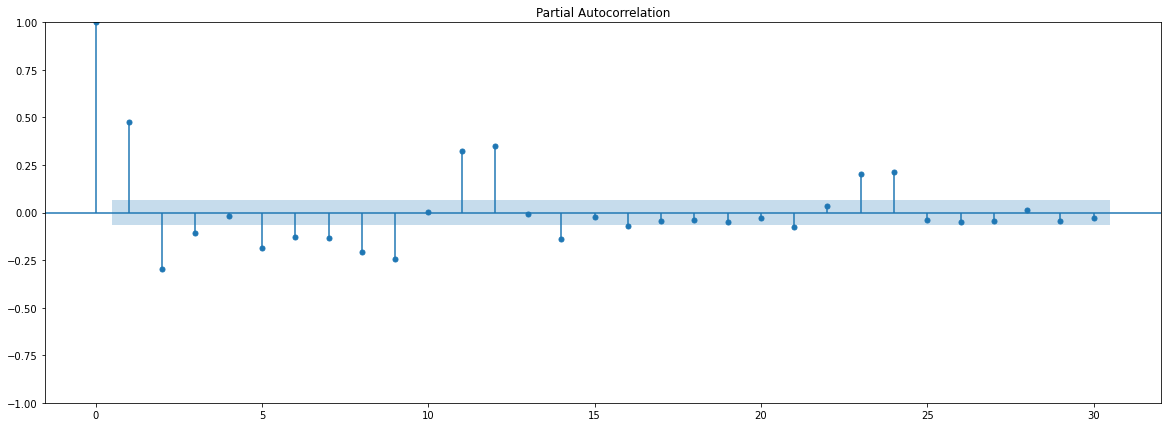

Precipitation


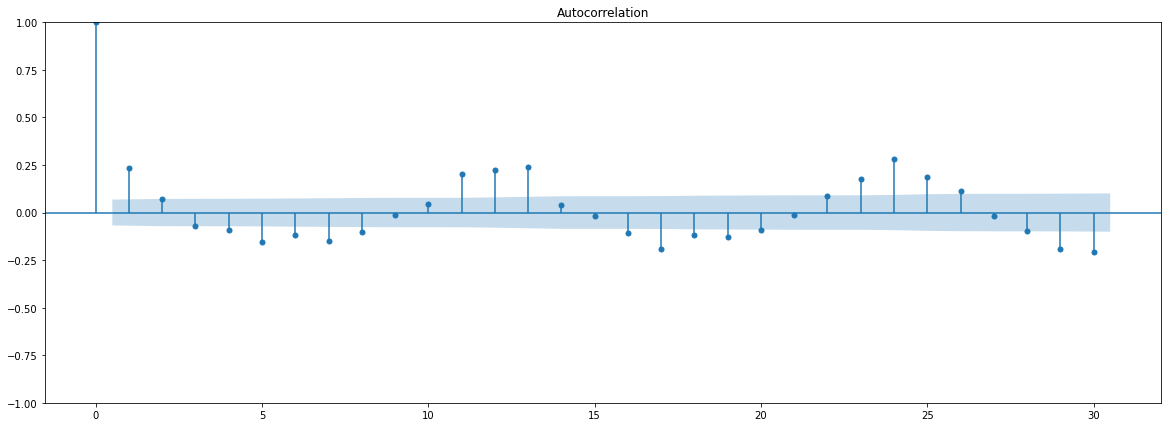

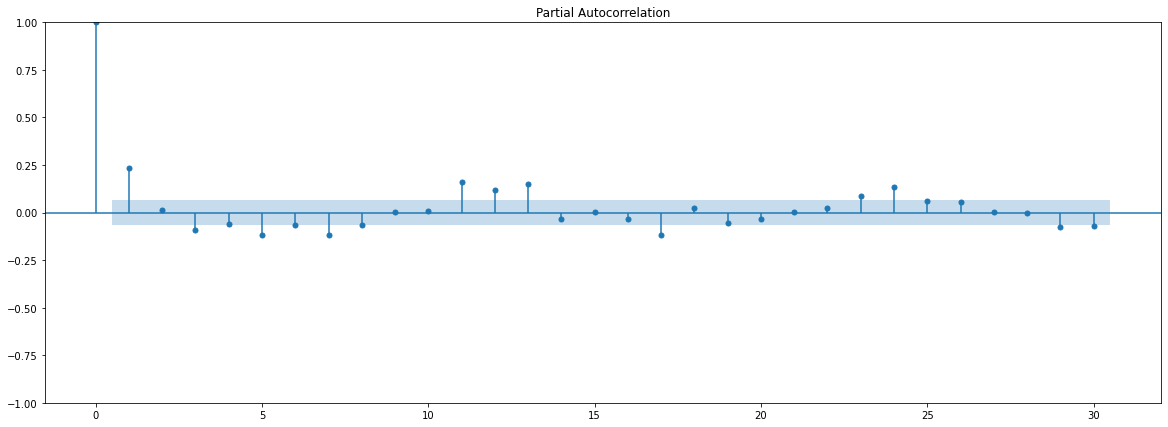

Stationarity
Evapotranspiration
((-7.7521626399819485, 9.95361107671025e-12, 20, 807, {'1%': -3.4384791480370605, '5%': -2.865128114094396, '10%': -2.5686806329529874}, 6657.914364880488), True)
Precipitation
((-6.79008030258194, 2.376966697737043e-09, 16, 811, {'1%': -3.4384389256151358, '5%': -2.8651103842072048, '10%': -2.568671188193778}, 7989.266312797525), True)
Correlation in Sicilia
Evapotranspiration


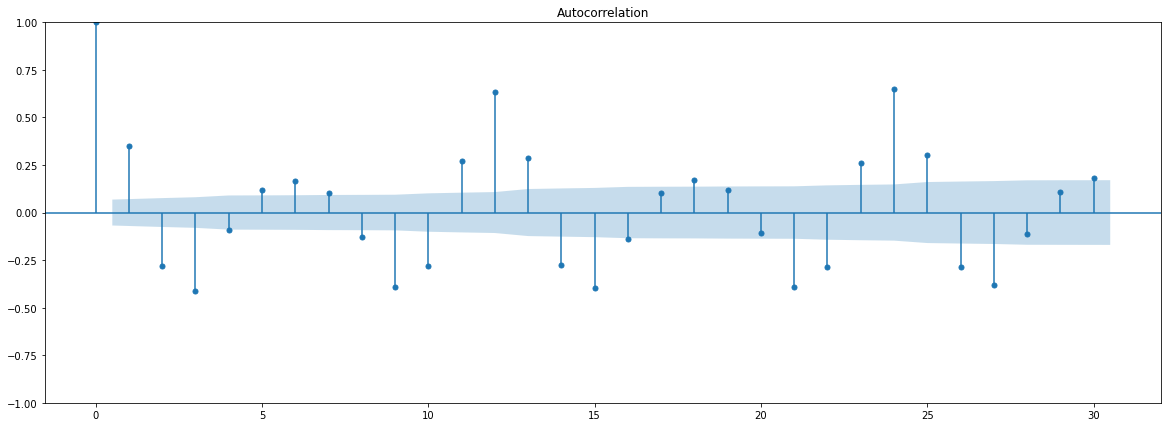

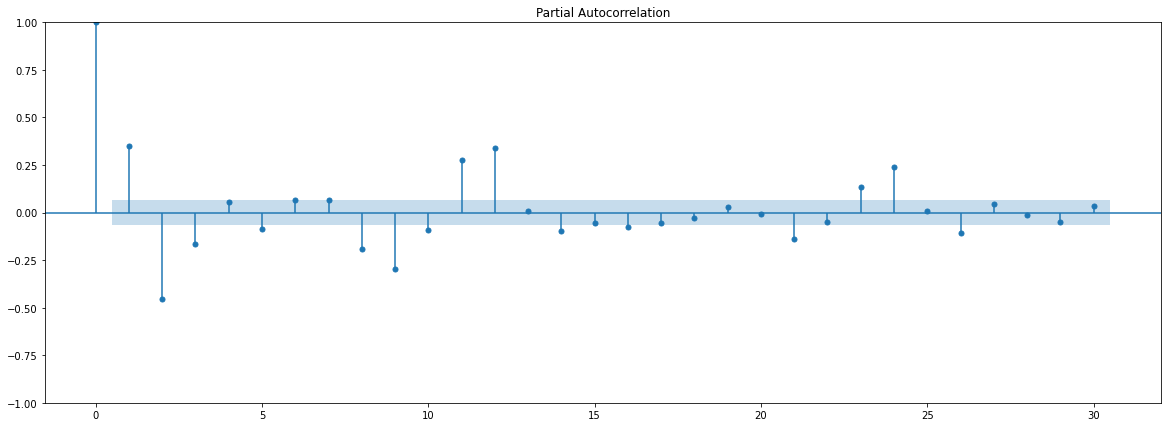

Precipitation


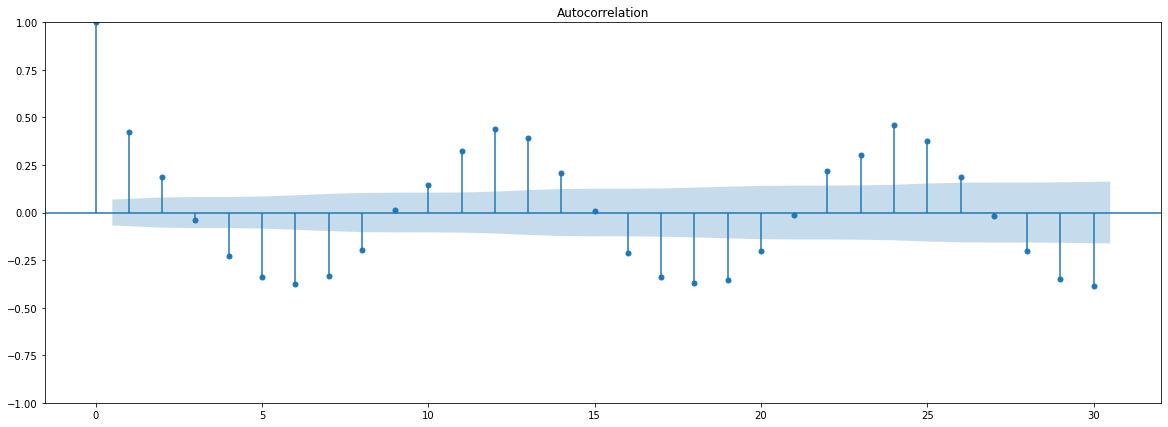

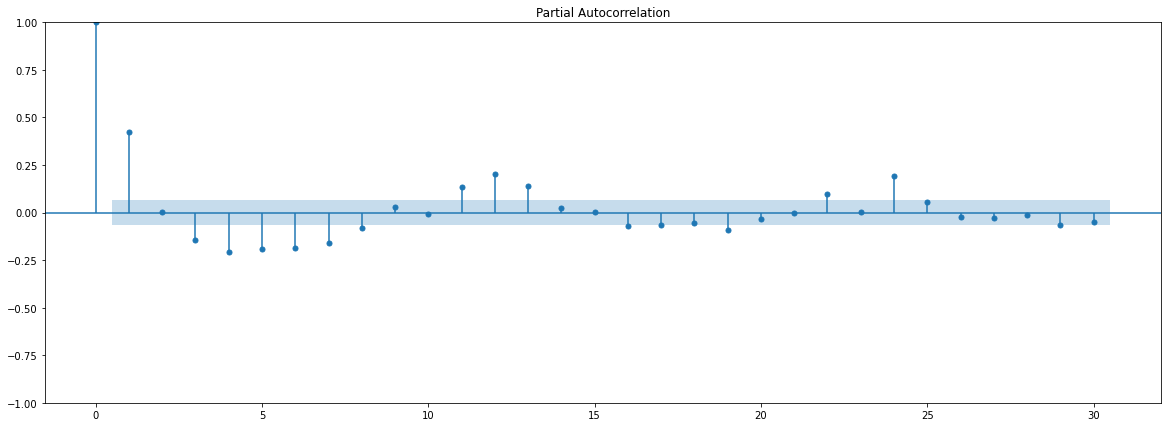

Stationarity
Evapotranspiration
((-7.879629768984761, 4.740967615657224e-12, 21, 806, {'1%': -3.438489266223099, '5%': -2.8651325741144573, '10%': -2.5686830088234025}, 6468.157815318436), True)
Precipitation
((-6.017895973174426, 1.5181716580332836e-07, 21, 806, {'1%': -3.438489266223099, '5%': -2.8651325741144573, '10%': -2.5686830088234025}, 8104.799763713928), True)
Correlation in Sardegna
Evapotranspiration


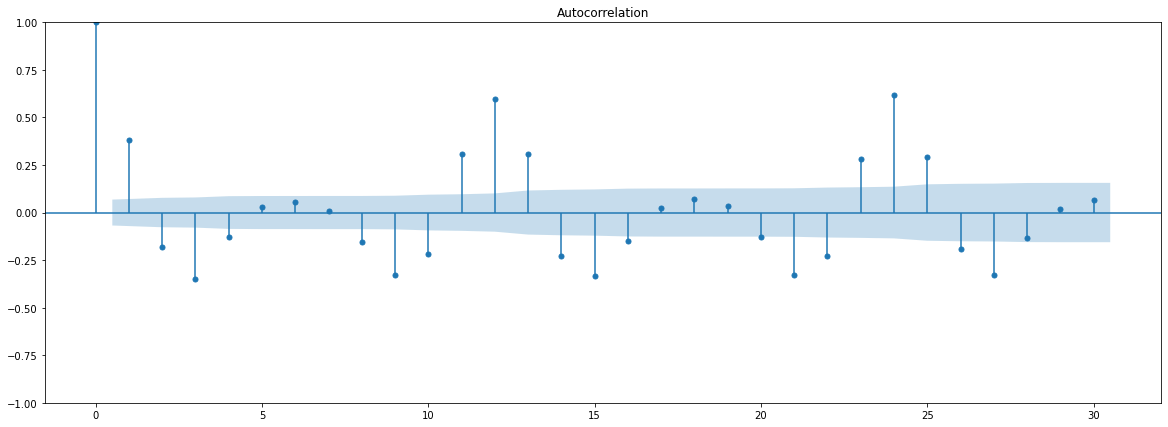

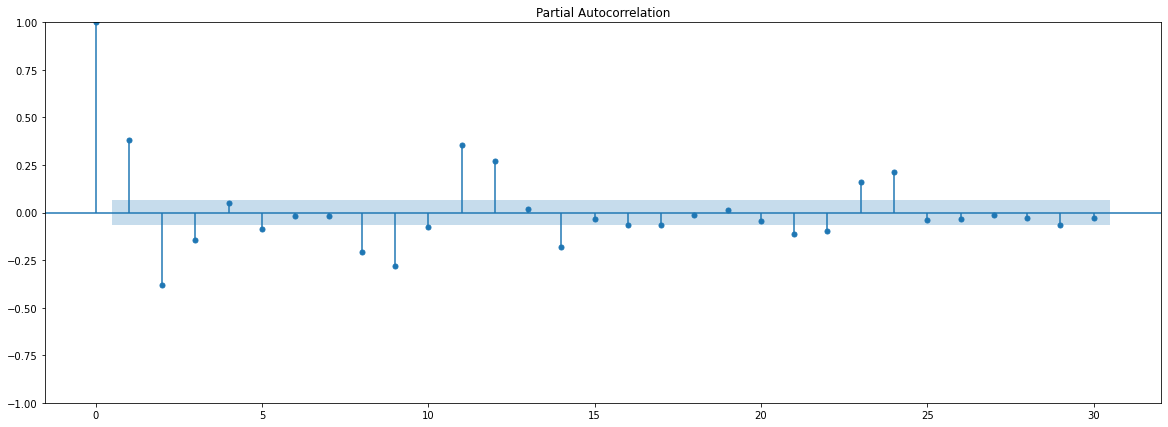

Precipitation


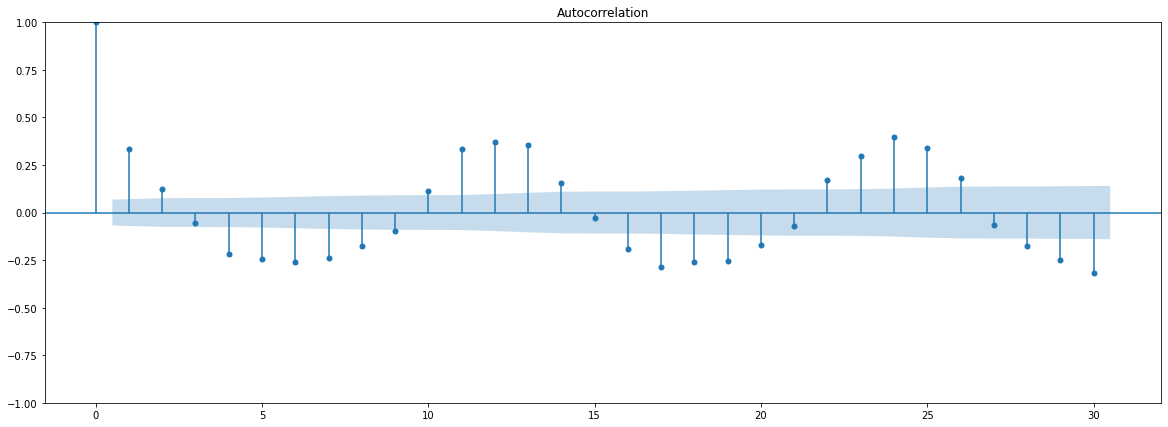

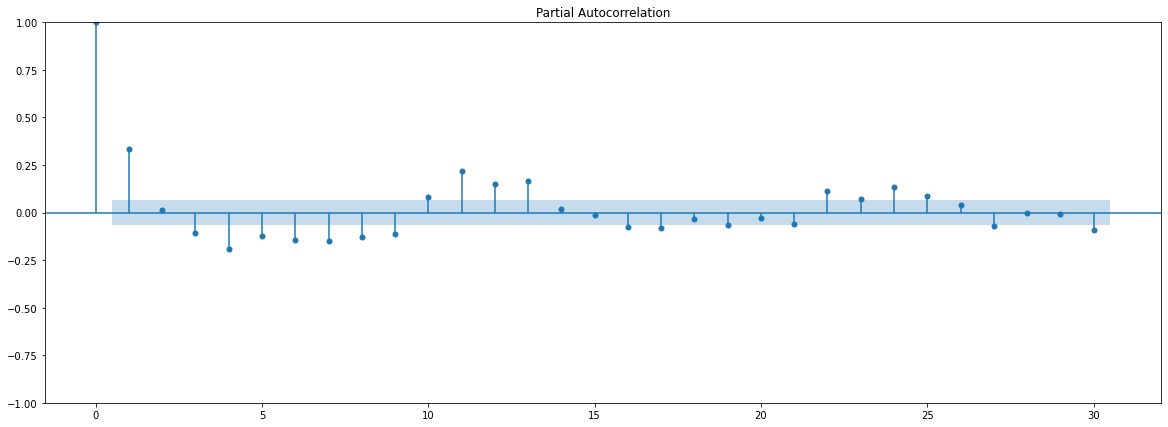

Stationarity
Evapotranspiration
((-8.782559411577788, 2.3551164655308975e-14, 21, 806, {'1%': -3.438489266223099, '5%': -2.8651325741144573, '10%': -2.5686830088234025}, 6654.4663056979125), True)
Precipitation
((-6.082946767348989, 1.08121016512856e-07, 21, 806, {'1%': -3.438489266223099, '5%': -2.8651325741144573, '10%': -2.5686830088234025}, 8238.201246719455), True)


In [7]:
for region in regions:
    print("Correlation in " + region)
    ae_reg = ae[region]
    tp_reg = tp[region]
    print("Evapotranspiration")
    plot_acf(ae_reg, lags=30)
    plt.show()
    plot_pacf(ae_reg, method="ywm")
    plt.show()
    plot_trend(seasonal_decompose(ae_reg, model='add'))
    print("Precipitation")
    plot_acf(tp_reg, lags=30)
    plt.show()
    plot_pacf(tp_reg, method="ywm")
    plt.show()
    plot_trend(seasonal_decompose(tp_reg, model='add'))
    print("Stationarity")
    print("Evapotranspiration")
    print(is_series_stationary(ae_reg))
    print("Precipitation")
    print(is_series_stationary(tp_reg))